# 시각화 - 제주핫플레이스

## 데이터 준비

In [1]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 제주핫플레이스.csv to 제주핫플레이스.csv


In [2]:
import pandas as pd
raw_df = pd.read_csv(filename)
raw_df.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [30]:
location_counts = raw_df.place.value_counts().to_frame()
print(location_counts.shape)
location_counts.head()

(1027, 1)


,place
Jeju,241
Jeju-do,172
Jungle Book by Alice,101
Seogwipo,65
제주도 크리스마스 박물관,59


In [31]:
location_counts.tail()

,place
해녀엄마의집,1
비양도 해녀촌,1
라비에 와인비스트로,1
올레길,1
삼다버거,1


In [7]:
location_counts.to_csv('location_counts.csv')

In [9]:
loc_df = pd.read_csv('location_counts.csv')
loc_df.columns = ['지명','빈도']
loc_df.head()

,지명,빈도
0,Jeju,241
1,Jeju-do,172
2,Jungle Book by Alice,101
3,Seogwipo,65
4,제주도 크리스마스 박물관,59


## 카카오 검색 API를 이용한 장소 검색
- 키워드 장소 검색

In [10]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving kakaoapikey.txt to kakaoapikey.txt


In [11]:
with open(filename) as f:
    api_key = f.read()

In [15]:
import requests
from urllib.parse import quote

In [16]:
keyword = '합정 스타벅스'
search_url = 'https://dapi.kakao.com/v2/local/search/keyword.json'
url = f'{search_url}?query={quote(keyword)}'
# Authorization : KakaoAK {REST_API_KEY}
result = requests.get(url,
                      headers={"Authorization": f'KakaoAK {api_key}'}).json()
result['documents'][0]

{'address_name': '서울 마포구 서교동 395-166',
 'category_group_code': 'CE7',
 'category_group_name': '카페',
 'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
 'distance': '',
 'id': '26572121',
 'phone': '1522-3232',
 'place_name': '스타벅스 서교점',
 'place_url': 'http://place.map.kakao.com/26572121',
 'road_address_name': '서울 마포구 양화로 78',
 'x': '126.916980454434',
 'y': '37.5514601750423'}

In [32]:
import numpy as np
import re

In [24]:
def find_place(keyword):
    url = f'{search_url}?query={quote(keyword)}'
    result = requests.get(url,
                      headers={"Authorization": f'KakaoAK {api_key}'}).json()
    try:
        name = result['documents'][0]['place_name']
        if '제주특별자치도' not in result['documents'][0]['address_name']:
            lng = np.nan
            lat = np.nan
        else:
            lng = float(result['documents'][0]['x'])    # 경도
            lat = float(result['documents'][0]['y'])    # 위도
    except:
        print(keyword)
        name = ''
        lng = np.nan
        lat = np.nan
    return name, lng, lat, keyword

In [29]:
find_place('제주공항')

('제주국제공항', 126.492769004244, 33.5070789578184, '제주공항')

In [34]:
re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣0-9 ]', '', '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地')

'제주도 서귀포 중문관광단지 '

In [35]:
# loc_df에 '공식명칭', '위도', '경도' 추가
name_list, lng_list, lat_list = [], [], []
for place in loc_df.지명:
    place =re.sub('[^가-힣0-9 ]', '', place).strip()
    if place:
        name, lng, lat, _ = find_place(place)
    else:
        name, lng, lat = '', np.nan, np.nan
    name_list.append(name)
    lng_list.append(lng)
    lat_list.append(lat)

제주고궁한복카페
위미2리 동백군락지
제주 꿈꾸는고래 스쿠버게스트하우스
제주 성산 신산포구자연산횟집 회포장
성산일출봉 게스트하우스 파티 띵까게스트하우스
함덕반하다
아날로그감귤체험
해발1950 한라산 백록담
스윗슬로
빨간모자마법사
붉은못허브팜   애월본점
제스토리 바이제주 제주감성소품
비브레이브 커피 로스터즈
윗세오름해발 1700
쌀다방
제주 서귀포 그릴 데미그라스
애월해안가
2월22일 브런치카페
제주 조류공원 화조원
의 한모신의 한모
다만프레르제주신화점
카페 하도섬
제주카페 스르륵
해물뚝배기전문 재암식당
모던플레이스 리조트
블루마린하우스
새별오름 정상
바굥식당
접대  저번에 우리가 만났던 그때
선화동1061
핸드테일러 제주점
협제 혜변
유민 아르누보 콜렉션
홍대 깐풍기브라더스
평화통일불사리탑사
성산일출봉 코앞 쉼터
동탄2에 산다
제주도 올레길 6코스 이중섭거리
릴리펏 제주점 메종글래드호텔
청초수물회섭국 신관
머스태쉬커피머스태쉬하우스
단디501
제주 반디앤로제이 펜션  플라워브런치카페
여수 앞바다
몽키비치
8월의크리스마스 초원사진관
빌리엔젤 제주노형점
중문 마린파크 퍼시픽랜드
소자38
성산수구레국밥
카페바띠
유채꽃사진촬영소
키아스마
포근한우리집
네이처캔바스
한라산 정상 해발 1950
원더먼트제주
목포고을 제주도 흑돼지 끝나는 맛
정방폭포가 보이는 암벽위
알뜨르프로젝트2018
새우조나단
김녕 앞바다
저녁정원
제주아트리움비밀의그림자공연
큰엉전망대쉼터
미나마라
제주초가집 곱들락
백리향백반
더커피브루
목수금토일
풍원 한라산볶음밥
미미본가
유리의성과마법의숲
블랙하우스 떡볶이레스토랑
한화아쿠아넷
제주마라도잠수함
섶섬해녀할망카페
제주도 하늘 위
블루밍아일랜드
군산 정상
건축카페  섶섬이보이는
오마주마카롱
곽지스테이션
제주신화월드 메리어트 리조트관
제주도가는 비행기 안
호끌락80번지
몽구네민박
기쁨이네 감자탕
타시텔레
서귀동 2985 세계의 가정식
돈테일러익스프레
미풍해장국  중앙점
오샹띠
기원뚝배기
헤이미쉬제주제주독채펜션
카페모리베이커스트리트
한복입는 선흘집
테라로사이사랑
카

In [36]:
loc_df['공식명칭'] = name_list
loc_df['위도'] = lat_list
loc_df['경도'] = lng_list
loc_df.head()

,지명,빈도,공식명칭,위도,경도
0,Jeju,241,,NaN,NaN
1,Jeju-do,172,,NaN,NaN
2,Jungle Book by Alice,101,,NaN,NaN
3,Seogwipo,65,,NaN,NaN
4,제주도 크리스마스 박물관,59,바이나흐튼 크리스마스박물관,33.291572,126.327858


In [37]:
# Null 데이터 유무 확인
loc_df.isnull().sum()

지명        0
빈도        0
공식명칭      0
위도      197
경도      197
dtype: int64

In [38]:
loc_df.isna().sum()

지명        0
빈도        0
공식명칭      0
위도      197
경도      197
dtype: int64

In [54]:
# Null 데이터 삭제
total_df = loc_df.dropna()        # Null 값이 있는 행을 삭제
total_df.isnull().sum().sum()

0

In [55]:
total_df.head()

,지명,빈도,공식명칭,위도,경도
4,제주도 크리스마스 박물관,59,바이나흐튼 크리스마스박물관,33.291572,126.327858
5,제주에인감귤밭,48,제주에인감귤밭,33.256561,126.539014
7,성산일출봉 城山日出峰 Seongsan Ilchulbong,36,성산일출봉,33.459135,126.940538
8,폼포코식당_pompokokitchen,30,폼포코식당,33.450408,126.919065
9,1100고지,25,한라산1100고지,33.358078,126.462220


In [56]:
# 공식명칭 중복 여부
total_df.공식명칭.value_counts()[:10]

올레길 7코스(서귀포-월평 올레)    6
함덕해수욕장                4
동문재래시장                4
한라산국립공원               3
우도                    3
비자림                   3
협재해수욕장                3
제주중문관광단지              3
천지연폭포                 3
세화해변                  3
Name: 공식명칭, dtype: int64

In [57]:
df = total_df.pivot_table(index=['공식명칭','위도','경도'], values='빈도', aggfunc='sum')
df.head()

,,,빈도
공식명칭,위도,경도,
1158족욕카페,33.467075,126.336504,1
40계단,35.103911,129.034571,1
702키친,33.498835,126.534134,1
CU 수원광장점,37.268151,127.000311,1
KT 브로 라페스타점,37.662346,126.767821,1


In [58]:
df.reset_index(inplace=True)
df.공식명칭.value_counts()[:5]

옹포별장가든        1
더마파크          1
호랑이           1
물의도시 베니스랜드    1
사랑분식          1
Name: 공식명칭, dtype: int64

In [59]:
df.to_csv('공식명칭.csv', index=False)

## Folium 지도 시각화

- 개별 표시

In [60]:
df.sort_values(by='빈도', ascending=False).head(10)

,공식명칭,위도,경도,빈도
230,바이나흐튼 크리스마스박물관,33.291572,126.327858,59
540,제주에인감귤밭,33.256561,126.539014,48
319,성산일출봉,33.459135,126.940538,38
664,폼포코식당,33.450408,126.919065,30
692,한라산1100고지,33.358078,126.462220,25
474,위미동백나무군락,33.272939,126.674731,24
472,월정리해수욕장,33.556469,126.795805,22
446,올레길 7코스(서귀포-월평 올레),33.237386,126.515310,21
29,고집돌우럭 중문점,33.257981,126.416705,21
725,협재해수욕장,33.393866,126.239158,20


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


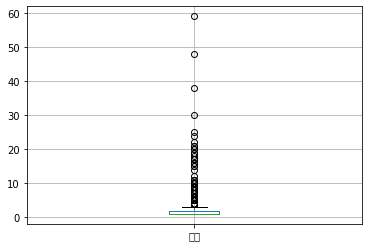

In [61]:
df[['빈도']].boxplot()

In [62]:
import folium

In [91]:
Mt_Hanla = [33.3625, 126.533694]
map = folium.Map(location=Mt_Hanla, zoom_start=11)

for i in df.index:
    folium.CircleMarker(
        radius=int(df.빈도[i]),             # int64는 처리불가
        location=[df.위도[i], df.경도[i]],
        popup=folium.Popup(df.공식명칭[i], max_width=200),
        tooltip=df.공식명칭[i],
        color='crimson'
    ).add_to(map)

map

- 그룹 표시

In [92]:
from folium.plugins import MarkerCluster

locations, names = [], []
for i in df.index:
    locations.append([df.위도[i], df.경도[i]])
    names.append(df.공식명칭[i])

In [94]:
map = folium.Map(location=Mt_Hanla, zoom_start=11)
MarkerCluster(
    locations=locations, popups=names,
    name='제주', overlay=True, control=True
).add_to(map)
map